## Modeling, Prediction & Statistical Thinking
We've shown in the introductory chapter how intelligence can be thought of as a form of compression, enabling us to recognize patterns and make sense of the world around us. To embark on our journey of deconstructing this understanding into machine code, thus enabling machine learning, we'll start by exploring linear regression. To my knowledge, this is the simplest optimization algorhitm, as I first encountered it in a High School algebra class, although it's significance wasn't fully contextualized by the constraints of Public School. 


Suppose we're a scientist studying plants and we picked up a leaf from an environment, and we want to determine if the sample is an existing species or a new one.
We cross reference characteristics of the sample with existing human knowledge, and we come to the conclusion that the sample might be a ginko leaf; however, upon retrospection you notice that the sample is **10x** larger in size then what ginko leaves are described to be(~6.35cm). We come to the conclusion that this might, infact, be a new variant of a ginko leaf; this is what we call a [hypothesis](https://en.wikipedia.org/wiki/Hypothesis). To prove this, and to gain mad Biology street cred, we come back to the tree to gather more evidence by way of collecting more samples. We measure the lenghts and widths of each of the leaves, and write them into a big data [table](./leaves.csv)(The set of all samples)

<style>
.ginko {
  position: relative; 
  display: inline-block;
  width: 50px; height: 50px; 
  /* border-radius: 32px; */
  /* object-fit:cover; */
}

i{
  z-index 9999;
  position:;
  height: auto;
  left: 0;
  top: 0;

  color: white;
  /* text-align: center; */
}
</style>

<div>
 <span style="font-size:30px;display: inline-block; height: 150px; align-items: center; justify-content: center; border: 1px solid black; margin-left: 10px;">
S={
<img src="../images/ginko.png" class="ginko" style ="filter: hue-rotate(  5deg);">  <i>s1</i></img>, 
<img src="../images/ginko.png" class="ginko" style ="filter: hue-rotate(  -5deg);"> <i>s1</i></img>, 
<img src="../images/ginko.png" class="ginko" style ="filter: hue-rotate(  -10deg);"><i>s1</i></img> ,
<img src="../images/ginko.png" class="ginko" style ="filter: hue-rotate(  -15deg);"><i>s1</i></img> ,
<img src="../images/ginko.png" class="ginko" style ="filter: hue-rotate(  -20deg);"><i>s1</i></img> ,
<img src="../images/ginko.png" class="ginko" style ="filter: hue-rotate(  -25deg);"><i>s1</i></img> ,
<img src="../images/ginko.png" class="ginko" style ="filter: hue-rotate(  -30deg);"><i>s1</i></img> ,
<img src="../images/ginko.png" class="ginko" style ="filter: hue-rotate(  -35deg);"><i>s1</i></img> ,
<img src="../images/ginko.png" class="ginko" style ="filter: hue-rotate(  -40deg);"><i>s1</i></img> ,
<img src="../images/ginko.png" class="ginko" style ="filter: hue-rotate(  -45deg);"><i>s1</i></img> ,
<img src="../images/ginko.png" class="ginko" style ="filter: hue-rotate(  -50deg);"><i>s1</i></img> ,
...                                                                                    ,s<sub>n</sub>}
    </span>
</div>
<div>
<div>

<divs tyle="display: inline-block; align-items: center;">
  <span style="display: inline-flex; align-items: center; justify-content: center; border: 1px solid black; margin-left: 10px;">
    s<sub>0</sub> = 
    <img src="../images/ginko.png" style="width: 150px; height: 150px; object-fit:cover;">
  </span>
    <span >
    X1 - Lenght
    </span>
    <span>
    X2 - Radius
    </span>
</div>

&darr; Measure the set of samples

| Sample | Leaf Lenght |  Leaf Radius |
| ------------- | ------------- | ------------- |
| s<sub>0</sub> |  25.5 | 3.2|
| s<sub>1</sub> |  28.3 | 5.3|
| s<sub>2</sub> |  23.8 | 4.3|
| ...  | ... | ...|
| s<sub>n</sub>  | x<sub>n</sub>  | y<sub>n</sub>|



<br>
<br>


By doing so, we constructed a [metric](http://wiki.gis.com/wiki/index.php/Metric_(mathematics)#:~:text=In%20mathematics%2C%20a%20metric%20or,be%20generated%20by%20a%20metric.) upon our problem domain, which is just a fancy way of saying we're measuring things to prove our conclusion. We can now use this metric to reason about the hypothesis because it gives us information to work with in the context of leaves observed.



<br>

**We can load this data into Python and visualize it like so:**

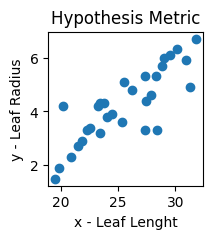

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Reading the csv containing our leaf samples
df = pd.read_csv('./data/leaves.csv')

# Convert DataFrame to a NumPy array
numpy_array = df.to_numpy(dtype=np.float32)


# Extract x and y coordinates from the NumPy array
x = numpy_array[:, 0]
y = numpy_array[:, 1]

# Plot the data
import matplotlib.pyplot as plt

plt.figure(figsize=(2,2)) 
plt.scatter(x, y)
plt.xlabel('x - Leaf Lenght')
plt.ylabel('y - Leaf Radius')
plt.title('Hypothesis Metric')
plt.show()



If we look at the first plot, it doesn't really tell us much, but by looking at the data we can start drawing some conclusions about the nature of our samples.
If you look at how the points are generally spread out, you can deduce a general trend: points on the right side of the graph tend to cluster at the top-right corner of the graph, wheres points on the left side of the graph cluster at the bottom-left.


What we essentially did here is construct a scientific [model](https://en.wikipedia.org/wiki/Mathematical_model). We use this observation to deduce and extrapolate our assumption about the samples to say that the bigger the lenght of the leaf that we measure, the bigger we can expect it's radius to be; this is called a correlation between two variable parameters of our model. This makes sense because although the leaves can vary in length and radius, we expect the two variables to generally trend upwards together. This is not that useful for differentiating between different species, as we would have to compare our model of this leaf with the model of the base species we're trying to distinguish from, however we now can make a statement about the species we're differentiating; and more importantly, about the the traits we measured and how they're related. 

Lets similarly, collect samples of ginko biloba(our reference plant) and construct a ginko model using the same metric,

**Load ginko data and compare it to the hypothetical species using the following code:**

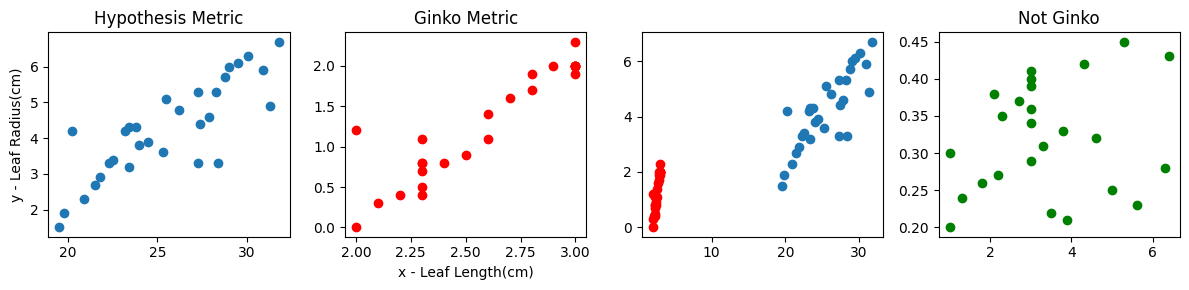

In [2]:
df = pd.read_csv('./data/ginko.csv')
numpy_array = df.to_numpy(dtype=np.float32)
x_t = numpy_array[:, 0]
y_t = numpy_array[:, 1]

df = pd.read_csv('./data/notginko.csv')
numpy_array = df.to_numpy(dtype=np.float32)
x_l = numpy_array[:, 0]
y_l = numpy_array[:, 1]




fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 3))

axes[0].scatter(x, y,)
axes[2].scatter(x, y,)
axes[0].set_ylabel('y - Leaf Radius(cm)')
axes[0].set_title('Hypothesis Metric')

axes[1].scatter(x_t, y_t,c="red")
axes[2].scatter(x_t, y_t,c="red")
axes[1].set_xlabel('x - Leaf Length(cm)')
axes[1].set_title('Ginko Metric')


axes[3].set_title('Not Ginko')
axes[3].scatter(x_l, y_l,c="green")

# Add the mean line to the second plot
y_mean = np.mean(y)

plt.tight_layout()
plt.show()

Now its getting interesting. If we look at the plots of the hypothesis and ginko samples, we can infer that they have the same relationship between the metric parameters, but by putting the two models in the same space, we can clearly see that the two distributions of points are different, as their absolute values are in completely different ranges. This, in my opinion, is one of the fundamental concepts of machine learning. By creating a shared metric of parameters between two classes of models, we created a sort of abstract space in which we can clearly see the differences in those parameters. More on that in chapter 2

 
## Refining our model further using statistics 
At the moment, our model is purely a set of assumptions. We've collected samples, then visually examined them. Now let's analyze our model by approaching the problem analitically, which means extrapolating these assumptions further and  reasoning about the wider domain of our problem.
 
 **Variance** is a measure of the spread or dispersion of a set of data points. It indicates how far individual data points are from the mean of the dataset. Mathematically, the variance of a variable $x$ is calculated as:

$$
\operatorname{Var}(x) = \frac{\sum_{i=1}^{n} (x_i - \overline{x})^2}{n - 1}
$$

where $x_i$ is an individual data point, $\overline{x}$ is the mean of $x$, and $n$ is the number of data points.

**Covariance** is a measure of the joint variability between two variables. It indicates the degree to which two variables change together. In the context of linear regression, covariance is used to understand how much the dependent variable ($y$) changes concerning the independent variable ($x$). Mathematically, the covariance between two variables $x$ and $y$ is calculated as:

$$
\operatorname{Cov}(x, y) = \frac{\sum_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})}{n - 1}
$$

where $x_i$ and $y_i$ are the individual data points, $\overline{x}$ and $\overline{y}$ are the means of $x$ and $y$, and $n$ is the number of data points.

**In Linear Regression**, we aim to find the best-fit line that models the relationship between the independent variable ($x$) and the dependent variable ($y$). To do this, we need to estimate the slope ($m$) and intercept ($c$) of the line:

$$
y = mx + c
$$

The slope ($m$) represents the rate of change of $y$ concerning $x$, and the intercept ($c$) is the point where the line crosses the y-axis (when $x$ is 0).

Covariance and variance are used to estimate the slope ($m$) of the best-fit line:

$$
m = \frac{\operatorname{Cov}(x, y)}{\operatorname{Var}(x)}
$$

The slope ($m$) is calculated as the ratio of the covariance between $x$ and $y$ to the variance of $x$. This ratio represents the average change in $y$ per unit change in $x$. Once the slope ($m$) is calculated, the intercept ($c$) can be computed as:

$$
c = \overline{y} - m \overline{x}
$$

By estimating the slope and intercept, we can create the linear model that best describes the relationship between the two variables.

Slope: 0.3058653
Intercept: -3.567721


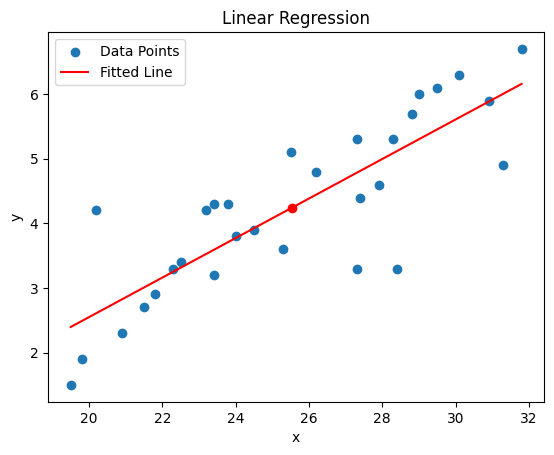

In [3]:
# Calculate the mean of x and y
mean_x = np.mean(x)
mean_y = np.mean(y)

# Calculate the covariance of x and y, and the variance of x
cov_xy = np.sum((x - mean_x) * (y - mean_y))
var_x = np.sum((x - mean_x)**2)

# Compute the slope (m) and the intercept (c) of the line
m = cov_xy / var_x
c = mean_y - m * mean_x

# Make predictions for new x values
x_new = np.linspace(min(x), max(x), 100)  # 100 evenly spaced points between min(x) and max(x)
y_pred = m * x_new + c

# Print the slope and intercept
print("Slope:", m)
print("Intercept:", c)

# Plot the original data and the fitted line
import matplotlib.pyplot as plt

plt.plot(mean_x,mean_y,'ro') 
# plt.plot(var_x,mean_y,'go') 
plt.scatter(x, y, label='Data Points')
plt.plot(x_new, y_pred, color='red', label='Fitted Line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()


All of these terms allow us to reason about the species of plants

## Optimization Approach
Statistically analyzing our data can be valuable, however these approaches break down in higher dimensions.

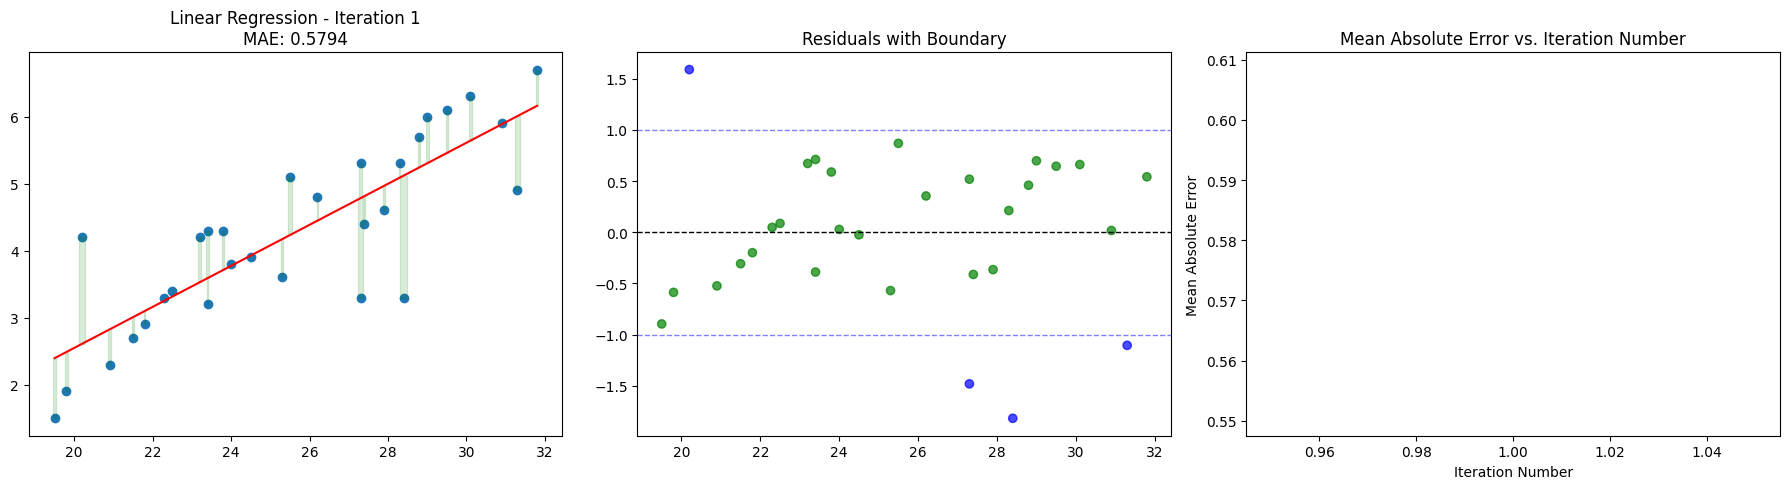

In [8]:
from IPython.display import clear_output
def gradient_descent(m, c, x, y, learning_rate, num_iterations, boundary=1):
    n = len(x)
    mae_history = []
    
    for i in range(num_iterations):
        # Calculate the gradients
        dm = -2 * np.mean((y - (m * x + c)) * x)
        dc = -2 * np.mean(y - (m * x + c))

        # Update the slope and intercept
        m -= learning_rate * dm
        c -= learning_rate * dc

        # Make predictions for new x values
        x_new = np.linspace(min(x), max(x), 100)
        y_pred = m * x_new + c

        # Compute the Mean Absolute Error (MAE)
        mae = np.mean(np.abs(y - (m * x + c)))
        mae_history.append(mae)

        # Create a 1x3 subplot
        fig, axes = plt.subplots(1, 3, figsize=(18, 5))
        axes[0].set_title(f'Linear Regression - Iteration {i + 1}\nMAE: {mae:.4f}')
        axes[1].set_title('Residuals with Boundary')
        axes[2].set_title('Mean Absolute Error vs. Iteration Number')

        # Plot the linear regression with scaled residuals
        axes[0].scatter(x, y, label='Data Points')
        axes[0].plot(x_new, y_pred, color='red', label='Fitted Line')
        for xi, yi in zip(x, y):
            residual = yi - (m * xi + c)
            width = abs(residual) * 0.1
            axes[0].fill_between([xi - width/2, xi + width/2], yi, m * xi + c, color='green', alpha=0.15)
        
        # Plot the residuals as a function of the independent variable (x) and color them based on the boundary
        residuals = y - (m * x + c)
        color = np.where(residuals > boundary, 'blue', np.where(abs(residuals) <= boundary, 'green', 'blue'))
        axes[1].scatter(x, residuals, color=color, alpha=0.7)
        axes[1].axhline(0, color='black', linestyle='--', linewidth=1)
        axes[1].axhline(boundary, color='blue', linestyle='--', linewidth=1, alpha=0.5)
        axes[1].axhline(-boundary, color='blue', linestyle='--', linewidth=1, alpha=0.5)

        

        # Plot the Mean Absolute Error (MAE) as a function of the iteration number
        axes[2].plot(range(1, i + 2), mae_history, color='blue', alpha=0.7)
        axes[2].set_xlabel('Iteration Number')
        axes[2].set_ylabel('Mean Absolute Error')

        plt.tight_layout()
        plt.show()

        # Clear the output to update the plot
        clear_output(wait=True)

# Apply gradient descent to find the optimal slope and intercept
gradient_descent(m, c, x, y, 0.1, 1)


#really ponder its significance, is the decision boundary the sum of all these tokens? is the decision boundary moving as you're generating the tokens? is the boundary the response in full?

